In [23]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important; }</style>"))

In [24]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
import seaborn as sns
import matplotlib.mlab as ml
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.ticker as plticker

def stdfigsize(scale=1, nx=1, ny=1, ratio=1.3):
    """
    Returns a tuple to be used as figure size.
    -------
    returns (7*ratio*scale*nx, 7.*scale*ny)
    By default: ratio=1.3
    If ratio<0 them ratio = golden ratio
    """
    if ratio < 0:
        ratio = 1.61803398875
    return((7*ratio*scale*nx, 7*scale*ny))

def stdrcparams(usetex=False):
    """
    Set several mpl.rcParams and sns.set_style for my taste.
    ----
    usetex = True
    ----
    """
    sns.set_style("white")
    sns.set_style({"xtick.direction": "in",
                 "ytick.direction": "in"})
    rcparams = {'text.usetex': usetex,
              'font.family': 'sans-serif',
              'font.sans-serif': ['Helvetica'],
             # 'text.latex.unicode': True,
              'text.latex.preamble': [r"\usepackage[T1]{fontenc}",
                                      r"\usepackage{lmodern}",
                                      r"\usepackage{amsmath}",
                                      r"\usepackage{mathptmx}"
                                      ],
              'axes.labelsize': 30,
              'axes.titlesize': 30,
              'ytick.right': 'on',
              'xtick.top': 'on',
              'xtick.labelsize': '25',
              'ytick.labelsize': '25',
              'axes.linewidth': 1.8,
              'xtick.major.width': 1.8,
              'xtick.minor.width': 1.8,
              'xtick.major.size': 14,
              'xtick.minor.size': 7,
              'xtick.major.pad': 10,
              'xtick.minor.pad': 10,
              'ytick.major.width': 1.8,
              'ytick.minor.width': 1.8,
              'ytick.major.size': 14,
              'ytick.minor.size': 7,
              'ytick.major.pad': 10,
              'ytick.minor.pad': 10,
              'axes.labelpad': 15,
              'axes.titlepad': 15,
              "xtick.direction": "in",
              "ytick.direction": "in",
              'legend.fontsize': 20}
    mpl.rcParams.update(rcparams) 

mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['lines.color'] = '#3690c0'

stdrcparams(usetex=True)
figsize=stdfigsize(ratio=-1)
xs,ys=figsize

def custom_frame(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis='x',length=10,direction='out')
    ax.tick_params(axis='x',which='minor',direction='out')
    ax.tick_params(axis='y',length=10,direction='out')
    ax.tick_params(axis='y',which='minor',direction='out')

In [4]:
import pickle
import itertools
import math
import random
import pandas as pd
import numpy as np
import networkx as nx

from datetime import date

In [5]:
def make_node_name(node):
    node = node.title()
    text = node.split('_')    
    if len(text)<3:
        return ','.join([text[0],text[1].upper()])
    else:
        city = ' '.join(text[0:-1])
        state = text[-1]
        state = state.upper()
        return ','.join([city,state])

In [6]:
df_air = pd.read_pickle('../data/networks/US_air_1990_2018.pkl')
nodes = set(df_air.source.unique())|set(df_air.target.unique())
df_air = df_air[df_air.source != df_air.target]
year = list(df_air.index.get_level_values(0).unique())
month = list(df_air.index.get_level_values(1).unique())
graphs_air = []
date_air = []
for y in year:
    for m in month:
#        if y != 2018 or m != 12:
        df = df_air.loc[y,m]
        date_air.append(date(y,m,1))
        G = nx.from_pandas_edgelist(df_air.loc[y,m], edge_attr=True)
        G.add_nodes_from(nodes)
        graphs_air.append(G)
        

n = date_air.index(date(2004,1,1))
graphs_air = graphs_air[n:]
date_air =  date_air[n:]

del df_air

In [7]:
import datetime
import calendar

def add_months(sourcedate, months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day, calendar.monthrange(year,month)[1])
    return datetime.date(year, month, day)

In [8]:
import glob, os

In [9]:
avg= np.mean([G.number_of_edges() for G in graphs_air[-12::]])

In [10]:
df = pd.DataFrame()
files = glob.glob('../simulation4/presults/model_graphs_gamma*_Nend2092*.pickle.dat') + glob.glob('../simulation4/presults/model_graphs_gamma*_Nend1255*.pickle.dat')
# + glob.glob('../simulation4/results0/model_graphs_gamma*_Nend2000*.pickle.dat')+ glob.glob('../simulation4/results/model_graphs_gamma0.04_Nend1000*.pickle.dat')
time,Nedges,gammas,nends = [],[],[],[]
for f in files:
    graphs_prediction = pickle.load(open(f,'rb'))
    g = f.strip('.pickle.dat').split('_')[-2].strip('gamma')
    nend = f.strip('.pickle.dat').split('_')[-1].strip('Nend')[0:4]
    N = len(graphs_prediction)
#     if True:
    if g in ['0.01','0.02','0.04']:#['0.001','0.005','0.01','0.05','0.1','0.5','1','5']:
        time += [add_months(date_air[-1],j) for j in range(N)]
        Nedges += [G.number_of_edges() for G in graphs_prediction]
        gammas += [g] * N
        nends += [nend] * N
df['time'] = time
df['Nedges'] = Nedges
df['$\gamma$'] = gammas
df['$N_{end}$'] =nends

In [14]:
# df = df.astype({'$\gamma$': 'float'})
# data = df[df['$\gamma$']>=0.008]
# data = data[data['$\gamma$']<1]
data=df

In [15]:
map_dict ={'3138':'50\%','2092':'67\%','1569':'75\%','1255':'80\%'}

In [16]:
[int(i) for i in [avg*1/2,avg*1/3,avg*1/4,avg*1/5]]

[3138, 2092, 1569, 1255]

In [17]:
data['$(N_{end},\gamma$)']= ['('+i+','+j+')' for i,j in zip(nends,gammas)]
data['Percent of edges'] = Nedges/avg
data['$R_f$'] = [map_dict[i] for i in nends]

In [18]:
data['$\gamma$'].unique()

array(['0.02', '0.04', '0.01'], dtype=object)

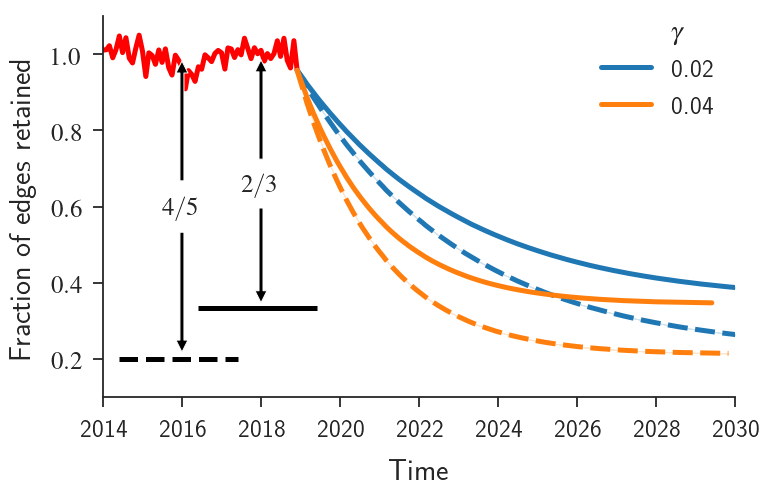

In [101]:
colors_g = ['#c7e9c0','#74c476','#006d2c']
colors_b = ['#deebf7','#9ecae1','#3182bd']
colors_or = ['#fee6ce','#fdae6b','#e6550d']
colors = sns.color_palette(None,2)
fig,ax = plt.subplots(figsize=(xs,ys))
plt.plot(date_air,np.array([G.number_of_edges() for G in graphs_air])/avg,c='r')

g = sns.lineplot(x="time", y="Percent of edges",hue='$\gamma$',style='$R_f$',palette=colors, style_order=['67\%','80\%'],legend = 'full', 
             ci=95,n_boot=100,data=data[data['$\gamma$']!='0.01'],ax=ax)
plt.xlabel('Time')
plt.ylabel("Fraction of edges retained")
# plt.axhline(y=2000,linestyle='--',c='black')
# plt.axhline(y=1000,linestyle='--',c='black')
plt.xlim(date(2014,1,1),date(2030,1,1))
plt.ylim(0.1,1.1)
# plt.yticks([1000,2000,3000,4000,5000,6000,7000])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[0:3], labels=labels[0:3],loc='upper right', bbox_to_anchor=(1.0, 1.05),
          ncol=1, fancybox=False, shadow=False,frameon=False,fontsize=25)#,title_fontsize=25)

ax.annotate('', xy=(date(2018,1,1), 1), xytext=(date(2018,1,1), 0.71),
            arrowprops=dict(facecolor='black', shrink=0.05),fontsize=25)
ax.annotate('$2/3$', xy=(date(2018,1,1), 1), xytext=(date(2017,7,1), 0.64),fontsize=25)
ax.annotate('', xy=(date(2018,1,1), 1/3), xytext=(date(2018,1,1), 0.61),
            arrowprops=dict(facecolor='black', shrink=0.05),fontsize=25)


ax.annotate('', xy=(date(2016,1,1), 1), xytext=(date(2016,1,1), 0.65),
            arrowprops=dict(facecolor='black', shrink=0.05),fontsize=25)
ax.annotate('$4/5$', xy=(date(2016,1,1), 1), xytext=(date(2015,7,1), 0.58),fontsize=25)
ax.annotate('', xy=(date(2016,1,1), 0.2), xytext=(date(2016,1,1), 0.55),
            arrowprops=dict(facecolor='black', shrink=0.05),fontsize=25)

plt.hlines(1/3,date(2016,6,1),date(2019,6,1))
plt.hlines(1/5,date(2014,6,1),date(2017,6,1),linestyle='--')

custom_frame(ax)
plt.savefig('../Figs/A_Fig.5A.pdf',transparent=True)
plt.show()

TypeError: __init__() got an unexpected keyword argument 'title_fontsize'

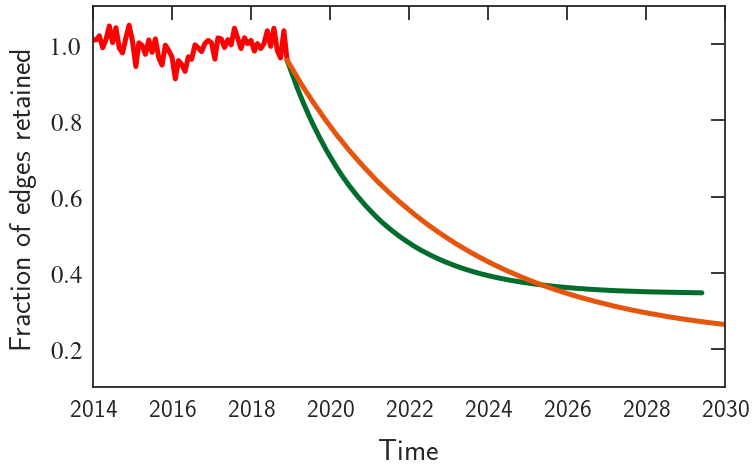

In [62]:
colors_g = ['#c7e9c0','#74c476','#006d2c']
colors_b = ['#deebf7','#9ecae1','#3182bd']
colors_or = ['#fee6ce','#fdae6b','#e6550d']
colors = sns.color_palette(None,3)
fig,ax = plt.subplots(figsize=(xs,ys))
plt.plot(date_air,np.array([G.number_of_edges() for G in graphs_air])/avg,c='r')

pdf=data[data['$(N_{end},\gamma$)']=='(2092,0.04)'].sort_values(by='time')
plt.plot(pdf.time,pdf['Percent of edges'],color=colors_g[2],label='67\%')

pdf=data[data['$(N_{end},\gamma$)']=='(1255,0.02)'].sort_values(by='time')
plt.plot(pdf.time,pdf['Percent of edges'],color=colors_or[2],label='80\%')
# g = sns.lineplot(x="time", y="Percent of edges",hue='$\gamma$',style='Final removal',palette=colors_g, style_order=['67\%','80\%'],legend = 'full', 
#              ci=95,n_boot=100,data=data,ax=ax)
plt.xlabel('Time')
plt.ylabel("Fraction of edges retained")
# plt.axhline(y=2000,linestyle='--',c='black')
# plt.axhline(y=1000,linestyle='--',c='black')
plt.xlim(date(2014,1,1),date(2030,1,1))
plt.ylim(0.1,1.1)
# plt.yticks([1000,2000,3000,4000,5000,6000,7000])
plt.legend(title='Final removal',loc='upper right', bbox_to_anchor=(1.0, 1.05),
          ncol=1, fancybox=False, shadow=False,frameon=False,title_fontsize=25)
pdf=data[data['$(N_{end},\gamma$)']=='(2092,0.01)'].sort_values(by='time')
plt.plot(pdf.time,pdf['Percent of edges'],color=colors_g[0],label=None)
pdf=data[data['$(N_{end},\gamma$)']=='(2092,0.02)'].sort_values(by='time')
plt.plot(pdf.time,pdf['Percent of edges'],color=colors_g[1],label=None)
custom_frame(ax)
# plt.savefig('../Figs/Fig.5A_2000+1000.pdf',transparent=True)
plt.show()

In [64]:
import collections

from scipy.stats import sem, t
from scipy import mean

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(len(mean)), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    ax.plot(mean, color_mean)
    
def get_survival_time(gamma,N_end):
    
    
    files = glob.glob(f'../simulation4/presults/model_graphs_gamma{gamma}_Nend{N_end}*.pickle.dat') #+ \
   # glob.glob(f'../simulation6/presults/model_graphs_gamma{gamma}_Nend{N_end}*.pickle.dat')
    G = pickle.load(open(files[0],'rb'))[0]
    edges_time = dict((edge,[]) for edge in list(G.edges()))
    for f in files:
        graphs = pickle.load(open(f,'rb'))
        for edge in list(G.edges()):
            a = (sum([g.has_edge(*edge) for g in graphs])-1)/12
            edges_time[edge].append(a) 
            
    
    files = glob.glob(f'../simulation4/presults/model_graphs_null_gamma{gamma}_Nend{N_end}*.pickle.dat')#+ \
    #glob.glob(f'../simulation6/presults/model_graphs_null_gamma{gamma}_Nend{N_end}*.pickle.dat')  
    G = pickle.load(open(files[0],'rb'))[0]
    edges_time_null = dict((edge,[]) for edge in list(G.edges()))
    for f in files:
        graphs = pickle.load(open(f,'rb'))
        for edge in list(G.edges()):
            a = (sum([g.has_edge(*edge) for g in graphs])-1)/12
            edges_time_null[edge].append(a) 
    
    confidence = 0.95
    x,y_mean,y_up,y_low = [],[],[],[]
    for e,v in edges_time.items():
        x.append(e)
        n=len(v)
        std_err = sem(v)
        m = np.mean(v)
        h = std_err * t.ppf((1 + confidence) / 2, n - 1)
        y_mean.append(m)
        y_up.append(m+h)
        y_low.append(m-h)
    
    x = [i for _,i in sorted(zip(y_mean,x))]
    y_up = [i for _,i in sorted(zip(y_mean,y_up))]
    y_low = [i for _,i in sorted(zip(y_mean,y_low))]
    y_mean = sorted(y_mean)
    
#     y_mean_null,y_up_null,y_low_null = [],[],[]
#     for e in x:
#         v=edges_time_null[e]
#         std_err = sem(v)
#         m = np.mean(v)
#         h = std_err * t.ppf((1 + confidence) / 2, n - 1)
#         y_mean_null.append(m)
#         y_up_null.append(m+h)
#         y_low_null.append(m-h)

    confidence = 0.95
    x_null,y_mean_null,y_up_null,y_low_null = [],[],[],[]
    for e,v in edges_time_null.items():
        n=len(v)
        x_null.append(e)
        std_err = sem(v)
        m = np.mean(v)
        h = std_err * t.ppf((1 + confidence) / 2, n - 1)
        y_mean_null.append(m)
        y_up_null.append(m+h)
        y_low_null.append(m-h)
        
    x_null = [i for _,i in sorted(zip(y_mean_null,x_null))]
    y_up_null = [i for _,i in sorted(zip(y_mean_null,y_up_null))]
    y_low_null = [i for _,i in sorted(zip(y_mean_null,y_low_null))]
    y_mean_null = sorted(y_mean_null)
    
    return(x,y_mean,y_up,y_low,x_null,y_mean_null,y_up_null,y_low_null)    

def plot_survival_time(gamma,N_end,data,ax,model=True):
    if model:
        x,y_mean,y_up,y_low=data[0:4]
        title = f'Model with $N =$ {N_end}, $\gamma =$ {gamma}'
        path = f'../figures//Fig5c_model_survival_exponential_Nend{N_end}_gamma{gamma}.pdf'
    else:
        x,y_mean,y_up,y_low=data[4::]
        title = f'Null with  $N =$ {N_end}, $\gamma =$ {gamma}'
        path = f'../figures//Fig5c_null_survival_exponential_Nend{N_end}_gamma{gamma}.pdf'
    
#     fig,ax=plt.subplots(figsize=(xs*1.5,ys*1.5))
    plot_mean_and_CI(y_mean, y_up, y_low, color_mean='k', color_shading='grey')
    text_size =25
    index = 3002#x.index(('seattle_wa', 'santa_rosa_ca'))
    ax.scatter([index],[y_mean[index]],c='r',s=200,zorder=10)
    ax.annotate(f'({make_node_name(x[index][0])}' + ';\n' + f'{make_node_name(x[index][1])})',
                xy=(index, y_mean[index]), xycoords='data',size=text_size,
                xytext=(-65,-100), textcoords='offset pixels',
                arrowprops=dict(arrowstyle="->",color='r'))


    index = 1 #x.index(('san_diego_ca', 'mountain_view_ca'))
    ax.scatter([index],[y_mean[index]],c='r',s=200,zorder=10)
    ax.annotate(f'({make_node_name(x[index][0])}' + ';\n' + f'{make_node_name(x[index][1])})',
                xy=(index, y_mean[index]), xycoords='data',size=text_size,
                xytext=(50,0), textcoords='offset pixels',
                arrowprops=dict(arrowstyle="->",color='r'))





    index = x.index(('new_york_ny','chicago_il'))
    ax.scatter([index],[y_mean[index]],c='r',s=200,zorder=10)
    ax.annotate(f'({make_node_name(x[index][0])}' + ';\n' + f'{make_node_name(x[index][1])})',
                xy=(index, y_mean[index]), xycoords='data',size=text_size,
                xytext=(-100,-200), textcoords='offset pixels',
                arrowprops=dict(arrowstyle="->",color='r'))
    
    show_edges = sorted([(i,j) for i,j in zip(edges,pred_prob_start) if center in i],key=lambda x: x[1],reverse=True)
    show_edges_t = show_edges[0:1]+show_edges[-1:]
    for e,j in show_edges_t:
        index = x.index(e)
        plt.scatter([index],[y_mean[index]],c='r',s=200,zorder=10)
        ax.annotate(f'({make_node_name(x[index][0])}' + ';\n' + f'{make_node_name(x[index][1])})',
                xy=(index, y_mean[index]), xycoords='data',size=text_size,
                xytext=(-60,60), textcoords='offset pixels',
                arrowprops=dict(arrowstyle="->",color='r'))
    plt.title(title)
    plt.xlabel('Edge importance')
    plt.ylabel('Survival time (month)')
    custom_frame(ax)


In [65]:
gamma =0.01
N_end=2092
G_start = pickle.load(open(f'../simulation6/presults/model_graphs_gamma{gamma}_Nend{N_end}1.pickle.dat','rb'))[0]
G_end = pickle.load(open(f'../simulation6/presults/model_graphs_gamma{gamma}_Nend{N_end}1.pickle.dat','rb'))[12*12]
add_time = len(pickle.load(open(f'../simulation6/presults/model_graphs_gamma{gamma}_Nend{N_end}1.pickle.dat','rb')))

In [66]:
from numbers import Number
import networkx as nx
from networkx.utils import is_string_like
from networkx.drawing.layout import shell_layout, \
    circular_layout, kamada_kawai_layout, spectral_layout, \
    spring_layout, random_layout, planar_layout

__all__ = ['draw',
           'draw_networkx',
           'draw_networkx_nodes',
           'draw_networkx_edges',
           'draw_networkx_labels',
           'draw_networkx_edge_labels',
           'draw_circular',
           'draw_kamada_kawai',
           'draw_random',
           'draw_spectral',
           'draw_spring',
           'draw_planar',
           'draw_shell']


def draw(G, pos=None, ax=None, **kwds):

    try:
        import matplotlib.pyplot as plt
    except ImportError:
        raise ImportError("Matplotlib required for draw()")
    except RuntimeError:
        print("Matplotlib unable to open display")
        raise

    if ax is None:
        cf = plt.gcf()
    else:
        cf = ax.get_figure()
    cf.set_facecolor('w')
    if ax is None:
        if cf._axstack() is None:
            ax = cf.add_axes((0, 0, 1, 1))
        else:
            ax = cf.gca()

    if 'with_labels' not in kwds:
        kwds['with_labels'] = 'labels' in kwds

    draw_networkx(G, pos=pos, ax=ax, **kwds)
    ax.set_axis_off()
    plt.draw_if_interactive()
    return



def draw_networkx(G, pos=None, arrows=True, with_labels=True, **kwds):

    try:
        import matplotlib.pyplot as plt
    except ImportError:
        raise ImportError("Matplotlib required for draw()")
    except RuntimeError:
        print("Matplotlib unable to open display")
        raise

    if pos is None:
        pos = nx.drawing.spring_layout(G)  # default to spring layout

    node_collection = draw_networkx_nodes(G, pos, **kwds)
    edge_collection = draw_networkx_edges(G, pos, arrows=arrows, **kwds)
    if with_labels:
        draw_networkx_labels(G, pos, **kwds)
    plt.draw_if_interactive()



def draw_networkx_nodes(G, pos,
                        nodelist=None,
                        node_size=300,
                        node_color='#1f78b4',
                        node_shape='o',
                        alpha=None,
                        cmap=None,
                        vmin=None,
                        vmax=None,
                        ax=None,
                        linewidths=None,
                        edgecolors=None,
                        label=None,
                        **kwds):

    from collections.abc import Iterable
    try:
        import matplotlib.pyplot as plt
        import numpy as np
    except ImportError:
        raise ImportError("Matplotlib required for draw()")
    except RuntimeError:
        print("Matplotlib unable to open display")
        raise

    if ax is None:
        ax = plt.gca()

    if nodelist is None:
        nodelist = list(G)

    if len(nodelist) == 0:  # empty nodelist, no drawing
        return

    try:
        xy = np.asarray([pos[v] for v in nodelist])
    except KeyError as e:
        raise nx.NetworkXError('Node %s has no position.' % e)
    except ValueError:
        raise nx.NetworkXError('Bad value in node positions.')

    if isinstance(alpha, Iterable):
        node_color = apply_alpha(node_color, alpha, nodelist, cmap, vmin, vmax)
        alpha = None

    node_collection = ax.scatter(xy[:, 0], xy[:, 1],
                                 s=node_size,
                                 c=node_color,
                                 marker=node_shape,
                                 cmap=cmap,
                                 vmin=vmin,
                                 vmax=vmax,
                                 alpha=alpha,
                                 linewidths=linewidths,
                                 edgecolors=edgecolors,
                                 label=label,transform=ccrs.Geodetic())
    ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False)

    node_collection.set_zorder(2)
    return node_collection



def draw_networkx_edges(G, pos,
                        edgelist=None,
                        width=1.0,
                        edge_color='k',
                        style='solid',
                        alpha=None,
                        arrowstyle='-|>',
                        arrowsize=10,
                        edge_cmap=None,
                        edge_vmin=None,
                        edge_vmax=None,
                        ax=None,
                        arrows=True,
                        label=None,
                        node_size=300,
                        nodelist=None,
                        node_shape="o",
                        connectionstyle=None,
                        min_source_margin=0,
                        min_target_margin=0,
                        **kwds):
    try:
        import matplotlib
        import matplotlib.pyplot as plt
        from matplotlib.colors import colorConverter, Colormap, Normalize
        from matplotlib.collections import LineCollection
        from matplotlib.patches import FancyArrowPatch
        import numpy as np
    except ImportError:
        raise ImportError("Matplotlib required for draw()")
    except RuntimeError:
        print("Matplotlib unable to open display")
        raise

    if ax is None:
        ax = plt.gca()

    if edgelist is None:
        edgelist = list(G.edges())

    if not edgelist or len(edgelist) == 0:  # no edges!
        return None

    if nodelist is None:
        nodelist = list(G.nodes())

    # FancyArrowPatch handles color=None different from LineCollection
    if edge_color is None:
        edge_color = 'k'

    # set edge positions
    edge_pos = np.asarray([(pos[e[0]], pos[e[1]]) for e in edgelist])

    # Check if edge_color is an array of floats and map to edge_cmap.
    # This is the only case handled differently from matplotlib
    if np.iterable(edge_color) and (len(edge_color) == len(edge_pos)) \
            and np.alltrue([isinstance(c, Number) for c in edge_color]):
        if edge_cmap is not None:
            assert(isinstance(edge_cmap, Colormap))
        else:
            edge_cmap = plt.get_cmap()
        if edge_vmin is None:
            edge_vmin = min(edge_color)
        if edge_vmax is None:
            edge_vmax = max(edge_color)
        color_normal = Normalize(vmin=edge_vmin, vmax=edge_vmax)
        edge_color = [edge_cmap(color_normal(e)) for e in edge_color]

    if (not G.is_directed() or not arrows):
        edge_collection = LineCollection(edge_pos,
                                         colors=edge_color,
                                         linewidths=width,
                                         antialiaseds=(1,),
                                         linestyle=style,
                                         transOffset=ax.transData,
                                         alpha=alpha,transform=ccrs.Geodetic()
                                         )

        edge_collection.set_zorder(1)  # edges go behind nodes
        edge_collection.set_label(label)
        ax.add_collection(edge_collection)

        return edge_collection

    arrow_collection = None

    if G.is_directed() and arrows:
        # Note: Waiting for someone to implement arrow to intersection with
        # marker.  Meanwhile, this works well for polygons with more than 4
        # sides and circle.

        def to_marker_edge(marker_size, marker):
            if marker in "s^>v<d":  # `large` markers need extra space
                return np.sqrt(2 * marker_size) / 2
            else:
                return np.sqrt(marker_size) / 2

        # Draw arrows with `matplotlib.patches.FancyarrowPatch`
        arrow_collection = []
        mutation_scale = arrowsize  # scale factor of arrow head

        # FancyArrowPatch doesn't handle color strings
        arrow_colors = colorConverter.to_rgba_array(edge_color, alpha)
        for i, (src, dst) in enumerate(edge_pos):
            x1, y1 = src
            x2, y2 = dst
            shrink_source = 0  # space from source to tail
            shrink_target = 0  # space from  head to target
            if np.iterable(node_size):  # many node sizes
                src_node, dst_node = edgelist[i][:2]
                index_node = nodelist.index(dst_node)
                marker_size = node_size[index_node]
                shrink_target = to_marker_edge(marker_size, node_shape)
            else:
                shrink_target = to_marker_edge(node_size, node_shape)

            if shrink_source < min_source_margin:
                shrink_source = min_source_margin

            if shrink_target < min_target_margin:
                shrink_target = min_target_margin

            if len(arrow_colors) == len(edge_pos):
                arrow_color = arrow_colors[i]
            elif len(arrow_colors) == 1:
                arrow_color = arrow_colors[0]
            else:  # Cycle through colors
                arrow_color = arrow_colors[i % len(arrow_colors)]

            if np.iterable(width):
                if len(width) == len(edge_pos):
                    line_width = width[i]
                else:
                    line_width = width[i % len(width)]
            else:
                line_width = width

            arrow = FancyArrowPatch((x1, y1), (x2, y2),
                                    arrowstyle=arrowstyle,
                                    shrinkA=shrink_source,
                                    shrinkB=shrink_target,
                                    mutation_scale=mutation_scale,
                                    color=arrow_color,
                                    linewidth=line_width,
                                    connectionstyle=connectionstyle,
                                    zorder=1)  # arrows go behind nodes

            # There seems to be a bug in matplotlib to make collections of
            # FancyArrowPatch instances. Until fixed, the patches are added
            # individually to the axes instance.
            arrow_collection.append(arrow)
            ax.add_patch(arrow)

    # update view
    minx = np.amin(np.ravel(edge_pos[:, :, 0]))
    maxx = np.amax(np.ravel(edge_pos[:, :, 0]))
    miny = np.amin(np.ravel(edge_pos[:, :, 1]))
    maxy = np.amax(np.ravel(edge_pos[:, :, 1]))

    w = maxx - minx
    h = maxy - miny
    padx,  pady = 0.05 * w, 0.05 * h
    corners = (minx - padx, miny - pady), (maxx + padx, maxy + pady)
    ax.update_datalim(corners)
    ax.autoscale_view()

    ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False)

    return arrow_collection



def draw_networkx_labels(G, pos,
                         labels=None,
                         font_size=12,
                         font_color='k',
                         font_family='sans-serif',
                         font_weight='normal',
                         alpha=None,
                         bbox=None,
                         ax=None,
                         **kwds):

    try:
        import matplotlib.pyplot as plt
    except ImportError:
        raise ImportError("Matplotlib required for draw()")
    except RuntimeError:
        print("Matplotlib unable to open display")
        raise

    if ax is None:
        ax = plt.gca()

    if labels is None:
        labels = dict((n, n) for n in G.nodes())

    # set optional alignment
    horizontalalignment = kwds.get('horizontalalignment', 'center')
    verticalalignment = kwds.get('verticalalignment', 'center')

    text_items = {}  # there is no text collection so we'll fake one
    for n, label in labels.items():
        (x, y) = pos[n]
        if not is_string_like(label):
            label = str(label)  # this makes "1" and 1 labeled the same
        t = ax.text(x, y,
                    label,
                    size=font_size,
                    color=font_color,
                    family=font_family,
                    weight=font_weight,
                    alpha=alpha,
                    horizontalalignment=horizontalalignment,
                    verticalalignment=verticalalignment,
                    transform=ccrs.Geodetic(),
                    bbox=bbox,
                    clip_on=True,
                    )
        text_items[n] = t

    ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False)

    return text_items


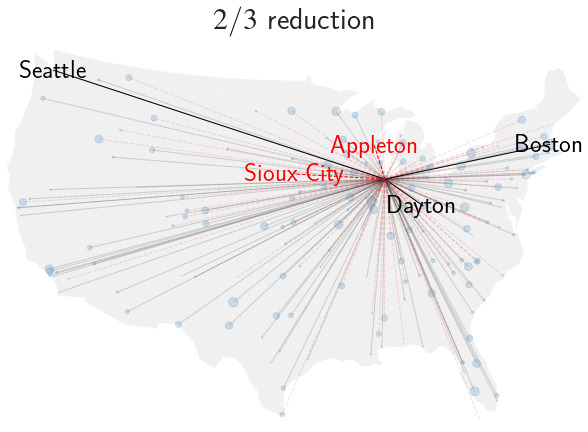

In [74]:
# import essential packages
import cartopy.crs as ccrs
import cartopy as cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from cartopy.io import shapereader
from matplotlib.lines import Line2D




n=3
gamma =0.02
N_end=2092
# G_start = pickle.load(open(f'../simulation4/results/model_graphs_null_gamma{gamma}_Nend{N_end}{n}.pickle.dat','rb'))[0]
# G_end = pickle.load(open(f'../simulation4/results/model_graphs_null_gamma{gamma}_Nend{N_end}{n}.pickle.dat','rb'))[12*12]
# add_time = len(pickle.load(open(f'../simulation4/results/model_graphs_null_gamma{gamma}_Nend{N_end}{n}.pickle.dat','rb')))
G_start = pickle.load(open(f'../simulation4/presults/model_graphs_gamma{gamma}_Nend{N_end}{n}.pickle.dat','rb'))[0]
G_end = pickle.load(open(f'../simulation4/presults/model_graphs_gamma{gamma}_Nend{N_end}{n}.pickle.dat','rb'))[10*12]
add_time = len(pickle.load(open(f'../simulation4/presults/model_graphs_gamma{gamma}_Nend{N_end}{n}.pickle.dat','rb')))
#function to convert node name to readable form
def make_node_name(node):
    node = node.title()
    text = node.split('_')    
    if len(text)<3:
        return ','.join([text[0],text[1].upper()])
    else:
        city = ' '.join(text[0:-1])
        state = text[-1]
        state = state.upper()
        return ','.join([city,state])

#nodes position information
pos = pd.read_pickle('../data/US_air_geo_information.pkl')

# center = 'burlington_vt'
center ='chicago_il'
show_edges = [i for i in list(G_start.edges()) if center in i]
show_edges = [edge for edge in show_edges if (pos[edge[0]].lng >= -128 and pos[edge[0]].lng <= -65 and pos[edge[1]].lng >= -128 and pos[edge[1]].lng <=-65)]
show_edges = [edge for edge in show_edges if (pos[edge[0]].lat >= 23 and pos[edge[1]].lat >= 23)]

label_edges = [('chicago_il', 'boston_ma'),
               ('chicago_il', 'dayton_oh'),
               ('chicago_il', 'sioux_city_ia'),
              ('chicago_il', 'appleton_wi'),
            #  ('chicago_il', 'fayetteville_ar'),
            #  ('chicago_il', 'burbank_ca'),
              ('chicago_il', 'seattle_wa')]#,
            #  ('chicago_il', 'miami_fl')]
G = nx.Graph()
G.add_edges_from([i for i in show_edges])
red_edges = [i for i in show_edges if not G_end.has_edge(*i)]
black_edges = [i for i in show_edges if G_end.has_edge(*i)]

red_label_edges = [e for e in label_edges if e in red_edges]
black_label_edges = [e for e in label_edges if e in black_edges]
red_label = dict([(i,make_node_name(i).split(',')[0]) for _,i in red_label_edges]) 
#red_label[center] = make_node_name(center).split(',')[0]
black_label = dict([(i,make_node_name(i).split(',')[0]) for _,i in black_label_edges]) 
#black_label[center] = make_node_name(center).split(',')[0]


# border = [-125,-67,25,50] # xmin_xmax_ymin_ymax
border = [-119,-74,23,50]
central_lon = np.mean(border[:2])
central_lat = np.mean(border[2:])


fig = plt.figure(figsize=(xs,ys),frameon=False)
ax = fig.add_subplot(1,1,1,projection=ccrs.AlbersEqualArea(central_lon, central_lat))

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)
shp = shapereader.Reader(states_shp)
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
for record, state in zip(shp.records(), shp.geometries()):
    name = record.attributes['name']
    facecolor = '#f0f0f0'
    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor='none',zorder=-1)
ax.set_extent(border)
# ax.set_xlim(-125,-67)
# ax.set_ylim(20,50)
# draw edges
draw(G,
        pos = pos,
        width= 1,
        alpha= 0.15,
        node_size = 0,
        edgelist= black_edges,
        edge_color = 'black',
        style = 'solid')

draw(G,
    pos = pos,
    width= 1,
    alpha= 0.15,
    node_size = 0,
    edgelist= red_edges,
    edge_color = 'red',
    style = 'dashed')

###labels
draw(G,
        pos = pos,
        width= 1,
        alpha= 1,
        node_size = 0,
        edgelist =  black_label_edges,
         labels= black_label,
         font_color = 'black',
        edge_color = 'black',
        style = 'solid',font_size=25)

draw(G,
    pos = pos,
    width= 1,
    alpha= 1,
    node_size = 0,
     edgelist =  red_label_edges,
     labels= red_label,
    edge_color = 'red',
     font_color = 'red',
    style = 'dashed',font_size=25)

# draw nodes
draw(G,
    pos = pos,
    node_color = '#377eb8',
    width= 0,
    alpha= 0.2,
    node_size = np.array(list(dict(G_end.degree()).values()))*1)

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
ax.set_title('$2/3$ reduction')
plt.savefig('../Figs/A_Fig.5C.png',bbox_inches='tight',dpi=200,transparent=True)
plt.show()

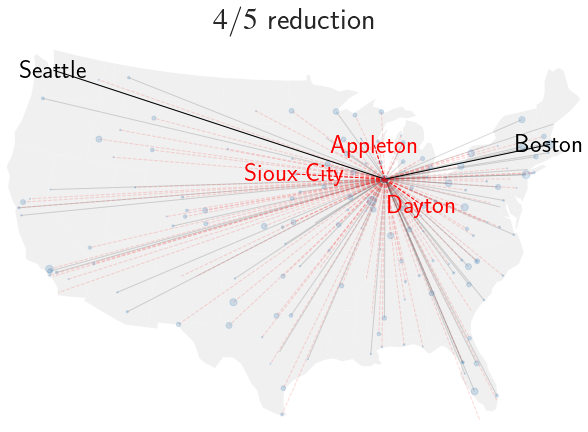

In [73]:
# import essential packages
import cartopy.crs as ccrs
import cartopy as cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from cartopy.io import shapereader
from matplotlib.lines import Line2D




n=2
gamma =0.04
N_end=1255
# G_start = pickle.load(open(f'../simulation4/results/model_graphs_null_gamma{gamma}_Nend{N_end}{n}.pickle.dat','rb'))[0]
# G_end = pickle.load(open(f'../simulation4/results/model_graphs_null_gamma{gamma}_Nend{N_end}{n}.pickle.dat','rb'))[12*12]
# add_time = len(pickle.load(open(f'../simulation4/results/model_graphs_null_gamma{gamma}_Nend{N_end}{n}.pickle.dat','rb')))
G_start = pickle.load(open(f'../simulation4/presults/model_graphs_gamma{gamma}_Nend{N_end}{n}.pickle.dat','rb'))[0]
G_end = pickle.load(open(f'../simulation4/presults/model_graphs_gamma{gamma}_Nend{N_end}{n}.pickle.dat','rb'))[10*12]
add_time = len(pickle.load(open(f'../simulation4/presults/model_graphs_gamma{gamma}_Nend{N_end}{n}.pickle.dat','rb')))
#function to convert node name to readable form
def make_node_name(node):
    node = node.title()
    text = node.split('_')    
    if len(text)<3:
        return ','.join([text[0],text[1].upper()])
    else:
        city = ' '.join(text[0:-1])
        state = text[-1]
        state = state.upper()
        return ','.join([city,state])

#nodes position information
pos = pd.read_pickle('../data/US_air_geo_information.pkl')

# center = 'burlington_vt'
center ='chicago_il'
show_edges = [i for i in list(G_start.edges()) if center in i]
show_edges = [edge for edge in show_edges if (pos[edge[0]].lng >= -128 and pos[edge[0]].lng <= -65 and pos[edge[1]].lng >= -128 and pos[edge[1]].lng <=-65)]
show_edges = [edge for edge in show_edges if (pos[edge[0]].lat >= 23 and pos[edge[1]].lat >= 23)]

label_edges = [('chicago_il', 'boston_ma'),
               ('chicago_il', 'dayton_oh'),
               ('chicago_il', 'sioux_city_ia'),
              ('chicago_il', 'appleton_wi'),
            #  ('chicago_il', 'fayetteville_ar'),
            #  ('chicago_il', 'burbank_ca'),
              ('chicago_il', 'seattle_wa')]#,
            #  ('chicago_il', 'miami_fl')]

G = nx.Graph()
G.add_edges_from([i for i in show_edges])
red_edges = [i for i in show_edges if not G_end.has_edge(*i)]
black_edges = [i for i in show_edges if G_end.has_edge(*i)]

red_label_edges = [e for e in label_edges if e in red_edges]
black_label_edges = [e for e in label_edges if e in black_edges]
red_label = dict([(i,make_node_name(i).split(',')[0]) for _,i in red_label_edges]) 
#red_label[center] = make_node_name(center).split(',')[0]
black_label = dict([(i,make_node_name(i).split(',')[0]) for _,i in black_label_edges]) 
#black_label[center] = make_node_name(center).split(',')[0]


# border = [-125,-67,25,50] # xmin_xmax_ymin_ymax
border = [-119,-74,23,50]
central_lon = np.mean(border[:2])
central_lat = np.mean(border[2:])


fig = plt.figure(figsize=(xs,ys),frameon=False)
ax = fig.add_subplot(1,1,1,projection=ccrs.AlbersEqualArea(central_lon, central_lat))

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)
shp = shapereader.Reader(states_shp)
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
for record, state in zip(shp.records(), shp.geometries()):
    name = record.attributes['name']
    facecolor = '#f0f0f0'
    ax.add_geometries([state], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor='none',zorder=-1)
ax.set_extent(border)
# ax.set_xlim(-125,-67)
# ax.set_ylim(20,50)
# draw edges
draw(G,
        pos = pos,
        width= 1,
        alpha= 0.15,
        node_size = 0,
        edgelist= black_edges,
        edge_color = 'black',
        style = 'solid')

draw(G,
    pos = pos,
    width= 1,
    alpha= 0.15,
    node_size = 0,
    edgelist= red_edges,
    edge_color = 'red',
    style = 'dashed')

###labels
draw(G,
        pos = pos,
        width= 1,
        alpha= 1,
        node_size = 0,
        edgelist =  black_label_edges,
         labels= black_label,
         font_color = 'black',
        edge_color = 'black',
        style = 'solid',font_size=25)

draw(G,
    pos = pos,
    width= 1,
    alpha= 1,
    node_size = 0,
     edgelist =  red_label_edges,
     labels= red_label,
    edge_color = 'red',
     font_color = 'red',
    style = 'dashed',font_size=25)

# draw nodes
draw(G,
    pos = pos,
    node_color = '#377eb8',
    width= 0,
    alpha= 0.2,
    node_size = np.array(list(dict(G_end.degree()).values()))*1)

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
ax.set_title('$4/5$ reduction')
plt.savefig('../Figs/A_Fig.5D.png',bbox_inches='tight',dpi=200,transparent=True)
plt.show()

In [75]:
gamma =0.02
N_end=2092
data_1 = get_survival_time(gamma,N_end)

In [76]:
data_2 = get_survival_time(0.02,1255)

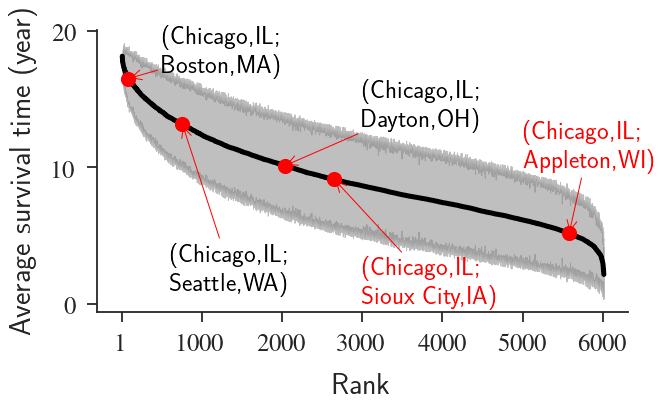

In [98]:
import collections

from scipy.stats import sem, t
from scipy import mean

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(np.arange(len(mean))+1, ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(np.arange(len(mean))+1,mean, color_mean)


x,y_mean,y_up,y_low=data_1[0:4]
x.reverse()
y_mean.reverse()
y_up.reverse()
y_low.reverse()
fig,ax=plt.subplots(figsize=(xs*0.8,ys*0.8))
plot_mean_and_CI(y_mean, y_up, y_low, color_mean='k', color_shading='grey')
text_size = 25


label_edges = [('chicago_il', 'appleton_wi'),
               ('chicago_il', 'sioux_city_ia'),
               ('chicago_il', 'dayton_oh'),
              ('chicago_il', 'seattle_wa'),
#                ('chicago_il', 'fayetteville_ar'),
               ('chicago_il', 'boston_ma')]
temp = [0,1,2,3,4]
xytextx=[(5000,10),(3000,0),(3000,13),(600,1),(500,17)]
textcolor = ['r','r','black','black','black']
for e,n in zip(label_edges,temp):
    index = x.index(e)
    plt.scatter([index],[y_mean[index]],c='r',s=200,zorder=10)
    ax.annotate(f'({make_node_name(x[index][0])}' + ';\n' + f'{make_node_name(x[index][1])})',
            xy=(index, y_mean[index]), xycoords='data',size=text_size,
            xytext=xytextx[n], textcoords='data',
            arrowprops=dict(arrowstyle="->",color='r'),color=textcolor[n])
gamma = 0.01
# plt.title('(67\%, 0.01)')
plt.xlabel('Rank')
plt.ylabel('Average survival time (year)')
plt.xticks([1,1000,2000,3000,4000,5000,6000])
plt.yticks([0,10,20])
custom_frame(ax)
# ax.set_title('$\gamma = 0.02, R_f = 67\%$')
plt.tight_layout()
plt.savefig('../Figs/A_Fig.5E.pdf',transparent=True)
plt.show()

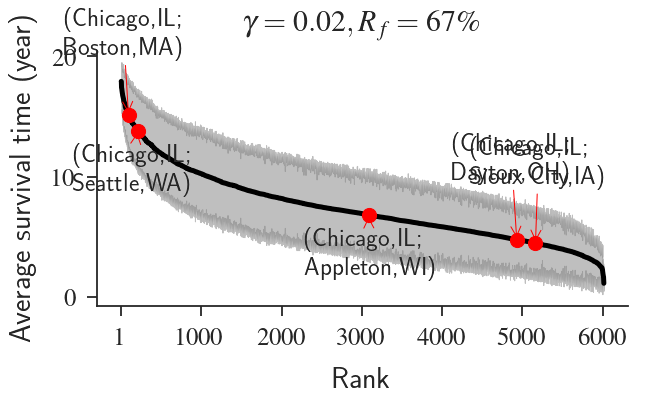

In [285]:
import collections

from scipy.stats import sem, t
from scipy import mean

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(np.arange(len(mean))+1, ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(np.arange(len(mean))+1,mean, color_mean)


x,y_mean,y_up,y_low=data_2[0:4]
# x.reverse()
# y_mean.reverse()
# y_up.reverse()
# y_low.reverse()
fig,ax=plt.subplots(figsize=(xs*0.8,ys*0.8))
plot_mean_and_CI(y_mean, y_up, y_low, color_mean='k', color_shading='grey')
text_size = 25
temp = [1,-1,1,-1,1]

label_edges = [('chicago_il', 'sioux_city_ia'),
                ('chicago_il', 'appleton_wi'),
               ('chicago_il', 'dayton_oh'),
              ('chicago_il', 'seattle_wa'),
                ('chicago_il', 'boston_ma')]

for e,n in zip(label_edges,temp):
    index = x.index(e)
    plt.scatter([index],[y_mean[index]],c='r',s=200,zorder=10)
    ax.annotate(f'({make_node_name(x[index][0])}' + ';\n' + f'{make_node_name(x[index][1])})',
            xy=(index, y_mean[index]), xycoords='data',size=text_size,
            xytext=(-65,n*60), textcoords='offset pixels',
            arrowprops=dict(arrowstyle="->",color='r'))
gamma = 0.01
# plt.title('$(N_{end},\gamma) =$ (2000,0.01)')
plt.xlabel('Rank')
plt.ylabel('Average survival time (year)')
plt.xticks([1,1000,2000,3000,4000,5000,6000])
plt.yticks([0,10,20])
custom_frame(ax)
ax.set_title('$\gamma = 0.02, R_f = 67\%$')
plt.tight_layout()
plt.savefig('../Figs/A_Fig.5E.pdf',transparent=True)
plt.show()

In [16]:
pd.DataFrame(data_1[0]).to_pickle('../data/ranked_edges.pkl')

In [78]:
distance = pd.read_pickle('../data/us_air_distance.pkl')
dict_dist = distance.set_index(['source_origin','target_origin']).to_dict()['distance']
dict_dist.update(distance.set_index(['target_origin','source_origin']).to_dict()['distance'])

In [55]:
# dict_dist

In [33]:
def plot_imp_vs_dist(bins=50):
    y = np.array([dict_dist[e] for e in data_1[0] if e in list(dict_dist.keys())])
    y = y[0:bins*(len(y)//bins)]
    y = np.log10(np.mean(y.reshape(-1, bins), axis=1))
    x = np.arange(len(y))
    fig,ax = plt.subplots(figsize=(xs,ys*0.8))
    plt.scatter(x,y)
    plt.xlabel('Edge importance')
    plt.ylabel('Distance')
    custom_frame(ax)
    plt.show()

In [26]:
# plot_imp_vs_dist(bins=1)

In [25]:
# plot_imp_vs_dist(bins=10)

In [27]:
# plot_imp_vs_dist(bins=50)

In [28]:
# plot_imp_vs_dist(bins=100)

In [79]:
import statsmodels.api as sm
import math
population = pd.read_pickle('../data/us_air_population_3.pkl').fillna(value=np.nan).to_dict()[0]
# def plot_imp_vs_g(y_mean=y_mean,alpha=2,bins=1):
#     x = []
#     for e in data_1[0]:
#         a,b = e
#         if (a,b) in list(dict_dist.keys()):
#             d = dict_dist[(a,b)]
#         elif (b,a) in list(dict_dist.keys()):
#             d = dict_dist[(b,a)]
#         else:
#             d = np.nan
#         if a in list(population.keys()):
#             pa = population[a]
#         else:
#             pa = np.nan
#         if b in list(population.keys()):
#             pb = population[b]
#         else:
#             pb = np.nan
#         x.append(pa*pb/d**alpha)
#         population_i.append(pa)
#         population_j.append(pb)
#     x = np.log(np.array(x))
#     y = y_mean
# #     y = np.array(y)
# #     y = y[0:bins*(len(y)//bins)]
# #     y = np.nanmean(y.reshape(-1, bins), axis=1)
#     fit_df = pd.DataFrame({'X':[i for i,j in zip(x,y) if (math.isfinite(i)==True)],
#     'Y':[j for i,j in zip(x,y) if (math.isfinite(i)==True)]})
#     X = fit_df[['X']]
#     X = sm.add_constant(X)
#     Y = fit_df[['Y']]
#     mod = sm.OLS(Y,X)
#     res = mod.fit()
#     beta = res.params['X']
#     const = res.params['const']
#     fit_x = np.linspace(min(x),max(x),10)
#     fit_y = beta*fit_x+const
#     fig,ax = plt.subplots(figsize=(xs*0.8,ys*0.8))
#     plt.scatter(x,y,alpha=0.6)
#     plt.plot(fit_x,fit_y,color='r',label=f'fitted: $Y={round(beta,4)} X+{round(const,2)}$')
#     plt.xlabel('$N_i*N_j/r^2$ ($log_e$)')
#     plt.ylabel('Average survival time (year)')
#     plt.title(f'alpha={alpha}')
#     custom_frame(ax)
#     # plt.legend()
#     plt.tight_layout()
# #     plt.savefig('../Figs/Fig.5D_v2.pdf',transparent=True)
#     plt.show()

In [80]:
ak_edges = []
for e in data_1[0]:
    a,b=e
    if 'ak'==a[-2::] or 'ak'==b[-2::] or 'hi'==a[-2::] or 'hi'==b[-2::] or 'tt'==a[-2::] or 'tt'==b[-2::]:
        ak_edges.append(e)
x_label,y_label = [],[]
for e in ak_edges:
    a,b = e
    if (a,b) in list(dict_dist.keys()):
        d = dict_dist[(a,b)]
    elif (b,a) in list(dict_dist.keys()):
        d = dict_dist[(b,a)]
    else:
        d = np.nan
    if a in list(population.keys()):
        pa = population[a]
    else:
        pa = np.nan
    if b in list(population.keys()):
        pb = population[b]
    else:
        pb = np.nan
    x_label.append(pa*pb/d**2)
    y_label.append(y_mean[data_1[0].index(e)])
x_label = np.log(np.array(x_label))
# x_label   

In [81]:
# for alpha in np.linspace(1,10,20):
#     plot_imp_vs_g(alpha=alpha)

In [82]:
bins=1
x,y = [],[]
population_i,population_j,dist_ij = [],[],[]
for e,yi in zip(data_1[0],y_mean):
    a,b = e
    if 'ak'!=a[-2::] and 'ak'!=b[-2::] and 'hi'!=a[-2::] and 'hi'!=b[-2::] and 'tt'!=a[-2::] and 'tt'!=b[-2::]:
        if (a,b) in list(dict_dist.keys()):
            d = dict_dist[(a,b)]
        elif (b,a) in list(dict_dist.keys()):
            d = dict_dist[(b,a)]
        else:
            d = np.nan
        if a in list(population.keys()):
            pa = population[a]
        else:
            pa = np.nan
        if b in list(population.keys()):
            pb = population[b]
        else:
            pb = np.nan
        x.append(pa*pb/d**2)
        population_i.append(pa)
        population_j.append(pb)
        dist_ij.append(d)
        y.append(yi)
x = np.log(np.array(x))
# x = np.array(x)
#     y = np.array(y)
# x = x[0:bins*(len(x)//bins)]
# x = np.nanmean(x.reshape(-1, bins), axis=1)
y = np.array(y)
# print(x)

In [274]:
# temp_df = pd.DataFrame({'edge':data_1[0],'average_suvival_time':y_mean,'population_i':population_i,'population_j':population_j,'distance':dist_ij})#.to_pickle('../data/average_suvival_time_data.pkl')

In [83]:
fit_df = pd.DataFrame({'X':[i for i,j in zip(x,y) if (math.isfinite(i)==True)],
'Y':[j for i,j in zip(x,y) if (math.isfinite(i)==True)]})
X = fit_df[['X']]
X = sm.add_constant(X)
Y = fit_df[['Y']]
mod = sm.OLS(Y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     633.7
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          7.75e-132
Time:                        13:36:19   Log-Likelihood:                -12659.
No. Observations:                5056   AIC:                         2.532e+04
Df Residuals:                    5054   BIC:                         2.534e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5174      0.230     15.276      0.0

In [84]:
res.conf_int()

,0,1
const,3.066008,3.968792
X,0.439418,0.513640


In [85]:
res.pvalues

const     1.534224e-51
X        7.745258e-132
dtype: float64

In [86]:
beta = res.params['X']
const = res.params['const']
fit_x = np.linspace(min(x),max(x),10)
fit_y = beta*fit_x+const

In [87]:
from scipy.stats import linregress
linregress(fit_df.X, fit_df.Y)

LinregressResult(slope=0.4765291301079167, intercept=3.517400007462605, rvalue=0.3337879200985138, pvalue=7.745257772544809e-132, stderr=0.0189300107855166)

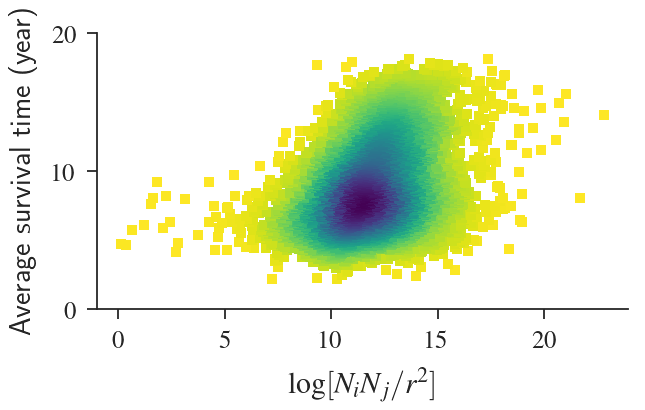

In [88]:
from scipy.stats import gaussian_kde

fig,ax = plt.subplots(figsize=(xs*0.8,ys*0.8))
# plt.scatter(x,y,color='#377eb8',alpha=0.6)
xy = np.vstack([fit_df.X,fit_df.Y])

z = gaussian_kde(xy)(xy)

cs = ax.scatter(fit_df.X, fit_df.Y, c=z,cmap=mpl.cm.get_cmap('viridis_r'), s=100, edgecolor='',marker='s')
# cbar = fig.colorbar(cs)
# plt.plot(fit_x,fit_y,color='#e41a1c')#,label=f'fitted: $Y={round(beta,4)} X+{round(const,2)}$')
# plt.scatter(x_label,y_label,color='#4daf4a',alpha=0.6,label='AK, HI, TT')
ax.set_xlabel(r'$\log [N_i N_j / r^2]$')
plt.ylabel('Average survival time (year)')
plt.ylim(0,20)
plt.yticks([0,10,20])
custom_frame(ax)
# plt.legend()
# ax.set_title('$\gamma = 0.02, R_f = 67\%$')
plt.tight_layout()
# plt.title('(67\%,0.02)')
plt.savefig('../Figs/A_Fig.5F.pdf',transparent=True)
plt.show()

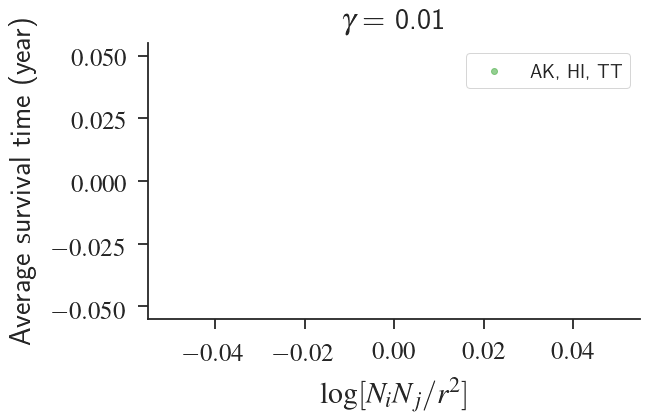

In [26]:
fig,ax = plt.subplots(figsize=(xs*0.8,ys*0.8))
plt.scatter(x,y,color='#377eb8',alpha=0.6)
# plt.plot(fit_x,fit_y,color='#e41a1c')#,label=f'fitted: $Y={round(beta,4)} X+{round(const,2)}$')
plt.scatter(x_label,y_label,color='#4daf4a',alpha=0.6,label='AK, HI, TT')
ax.set_xlabel(r'$\log [N_i N_j / r^2]$')
plt.ylabel('Average survival time (year)')
custom_frame(ax)
plt.legend()
plt.tight_layout()
plt.title(f'$\gamma =$ {gamma}')


# plt.savefig('../Figs/Fig.5D_v2AK.pdf',transparent=True)
plt.show()

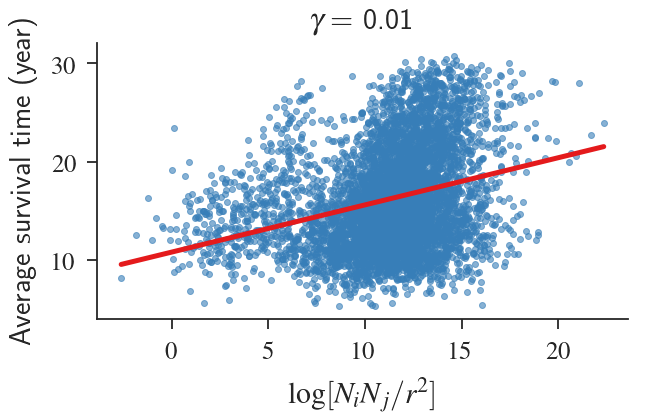

In [345]:
fig,ax = plt.subplots(figsize=(xs*0.8,ys*0.8))
plt.scatter(x,y,color='#377eb8',alpha=0.6)
plt.plot(fit_x,fit_y,color='#e41a1c')#,label=f'fitted: $Y={round(beta,4)} X+{round(const,2)}$')
# plt.scatter(x_label,y_label,color='#4daf4a',alpha=0.6,label='AK, HI, TT')
ax.set_xlabel(r'$\log [N_i N_j / r^2]$')
plt.ylabel('Average survival time (year)')
custom_frame(ax)
# plt.legend()
plt.tight_layout()
plt.title(f'$\gamma =$ {gamma}')
plt.savefig('../Figs/Fig.5D_v2Full.pdf',transparent=True)
plt.show()

In [353]:
fit_x_noAK = np.linspace(min(x),max(x),10)
fit_y_noAK = 0.82*fit_x_noAK+6.43

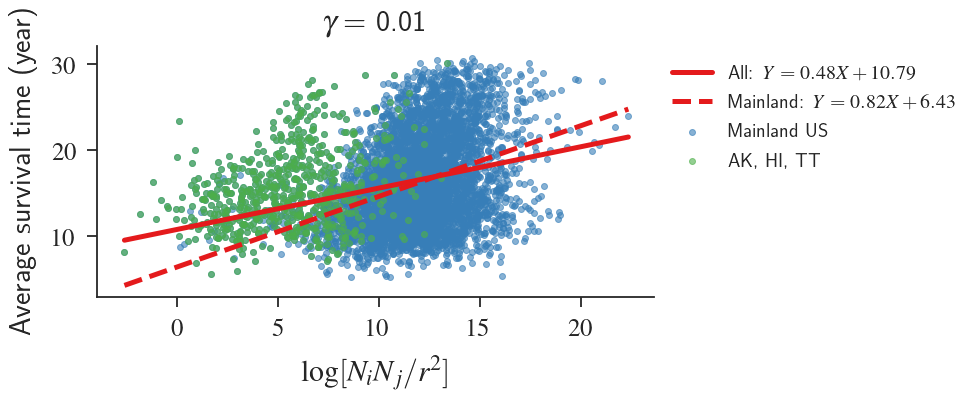

In [383]:
fig,ax = plt.subplots(figsize=(xs*1.2,ys*0.8))

plt.scatter(fit_df.X,fit_df.Y,color='#377eb8',alpha=0.6,label='Mainland US')
plt.scatter(x_label,y_label,color='#4daf4a',alpha=0.6,label='AK, HI, TT')
plt.plot(fit_x,fit_y,color='#e41a1c',label=f'All: $Y={round(beta,2)} X+{round(const,2)}$')
plt.plot(fit_x_noAK,fit_y_noAK,color='#e41a1c',linestyle='--',label=f'Mainland: $Y={round(0.82,2)} X+{round(6.43,2)}$')

ax.set_xlabel(r'$\log [N_i N_j / r^2]$')
plt.ylabel('Average survival time (year)')
custom_frame(ax)
plt.legend(bbox_to_anchor=(1.0,1.0),frameon=False)
plt.title(f'$\gamma =$ {gamma}')
plt.tight_layout()
plt.savefig('../Figs/Fig.SI_5D.pdf',transparent=True)
plt.show()

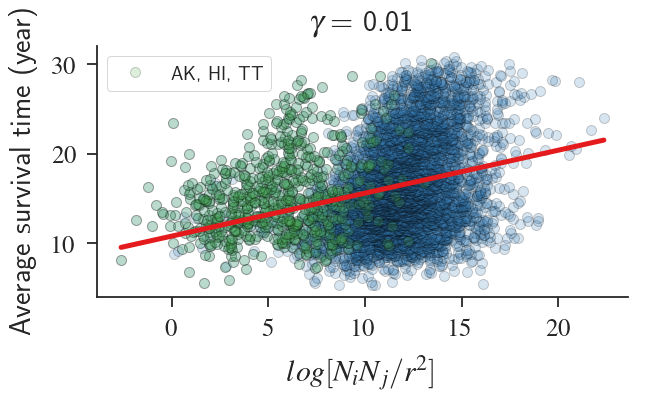

In [347]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(xs*0.8,ys*0.8))
plt.title(f'$\gamma =$ {gamma}')
ax.plot(x,y,'o',
        color='#377eb8',
        alpha=0.2,
        markersize=10,
        markeredgewidth=1.0, 
        markeredgecolor='k',
        rasterized=True,zorder=1)
ax.plot(fit_x,fit_y,color='#e41a1c',linewidth=5,zorder=2)
ax.plot(x_label,y_label,'o',
        color='#4daf4a',
        alpha=0.2,
        markersize=10,
        markeredgewidth=1.0, 
        markeredgecolor='k',
        rasterized=True,zorder=1,label='AK, HI, TT')
ax.set_xlabel(r'$log [N_i N_j / r^2]$')
ax.set_ylabel(r'Average survival time (year)')
custom_frame(ax)
plt.tight_layout()
plt.title(f'$\gamma =$ {gamma}')
plt.legend()
plt.savefig('../Figs/Fig.5D_v3AK.pdf',transparent=True)
plt.show()

In [12]:
co2_graphs_air = graphs_air[-12::]
def get_times(a,b):
    times = 0
    for G in co2_graphs_air:
        if G.has_edge(a,b):
            times+=G.get_edge_data(a,b)['weight']
        else:
            times+=0
    return times

In [13]:
bins=1
x,y = [],[]
population_i,population_j,dist_ij,times_ij = [],[],[],[]
for e,yi in zip(data_1[0],y_mean):
    a,b = e
#     if 'ak'!=a[-2::] and 'ak'!=b[-2::] and 'hi'!=a[-2::] and 'hi'!=b[-2::] and 'tt'!=a[-2::] and 'tt'!=b[-2::]:
    if (a,b) in list(dict_dist.keys()):
        d = dict_dist[(a,b)]
    elif (b,a) in list(dict_dist.keys()):
        d = dict_dist[(b,a)]
    else:
        d = np.nan
    if a in list(population.keys()):
        pa = population[a]
    else:
        pa = np.nan
    if b in list(population.keys()):
        pb = population[b]
    else:
        pb = np.nan
    x.append(pa*pb/d**2)
    population_i.append(pa)
    population_j.append(pb)
    dist_ij.append(d)
    times_ij.append(get_times(a,b))
    y.append(yi)
    
x = np.log(np.array(x))
# x = np.array(x)
#     y = np.array(y)
# x = x[0:bins*(len(x)//bins)]
# x = np.nanmean(x.reshape(-1, bins), axis=1)
y = np.array(y)
# print(x)

NameError: name 'data_1' is not defined

In [107]:
before = sum([x*n for i,x,n in sorted(zip(y,dist_ij,times_ij))])*32.5*1.60934*3.16*10**(-6)

In [110]:
after = sum([x*n for i,x,n in sorted(zip(y,dist_ij,times_ij)) if i <=14])*32.5*1.60934*3.16*10**(-6)

In [111]:
print(before,after,after/before)

15634.399704239135 3015.9181511630345 0.19290271505245538


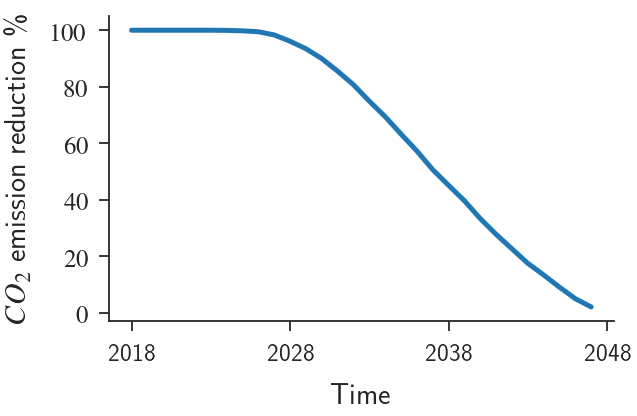

In [135]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(xs*0.8,ys*0.8))
# plt.title('')
plt.plot([100-sum([x*n for i,x,n in sorted(zip(y,dist_ij,times_ij)) if i <=l])*32.5*1.60934*3.16*10**(-6)/before*100 for l in range(30)])
ax.set_ylabel(r'$CO_2$ emission reduction \%')
ax.set_xlabel(r'Time')
# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels[1] = '2019'

plt.xticks([0,10,20,30],[2018,2028,2038,2048])
custom_frame(ax)
plt.show()

In [10]:
def get_dist(a,b):
    if (a,b) in list(dict_dist.keys()):
        d = dict_dist[(a,b)]
    elif (b,a) in list(dict_dist.keys()):
        d = dict_dist[(b,a)]
    return d
    
def get_co2(gamma,N_end):    
    files = glob.glob(f'../simulation4/results/model_graphs_gamma{gamma}_Nend{N_end}*.pickle.dat') + \
    glob.glob(f'../simulation4/results4/model_graphs_gamma{gamma}_Nend{N_end}*.pickle.dat')
    G = pickle.load(open(files[0],'rb'))[0]
    edges_time = dict((edge,[]) for edge in list(G.edges()))
    co2_hist = []
    for f in files:
        graphs = pickle.load(open(f,'rb'))
        co2_t=[]
        for G in graphs:
            co2_t.append(sum([get_times(a,b)*get_dist(a,b)*32.5*1.60934*3.16*10**(-6) for a,b in list(G.edges())]))
        co2_hist.append(co2_t)
    return co2_hist

In [14]:
data_2000_1 = get_co2(0.01,2000)

In [ ]:
data_2000_2 = get_edge_time(0.02,2000)

In [ ]:
data_2000_4 = get_edge_time(0.04,2000)

In [ ]:
data_2000_1


In [ ]:
print(i)

In [267]:
temp_df.head()
temp_df['g'] = np.log(temp_df.population_i*temp_df.population_j/temp_df.distance**2)

In [270]:
temp_df[temp_df.g<5]

,edge,average_suvival_time,population_i,population_j,distance,g
6,"(savoonga_ak, unalakleet_ak)",5.594444,671.0,688.0,297.0,1.655094
10,"(galena_ak, unalakleet_ak)",5.911111,470.0,688.0,130.0,2.951453
29,"(levelock_ak, igiugig_ak)",6.836111,69.0,50.0,37.0,0.924294
44,"(dillingham_ak, goodnews_bay_ak)",7.144444,2329.0,243.0,109.0,3.863560
58,"(south_bend_in, teterboro_nj)",7.461111,101168.0,67.0,640.0,2.806294
111,"(kahului_hi, teterboro_nj)",8.155556,26337.0,67.0,4907.0,-2.613413
158,"(nome_ak, russian_mission_ak)",8.516667,3598.0,312.0,229.0,3.063693
167,"(kahului_hi, eagle_co)",8.580556,26337.0,10266.0,3182.0,3.284792
198,"(savoonga_ak, teller_ak)",8.722222,671.0,229.0,164.0,1.742758
220,"(burbank_ca, teterboro_nj)",8.800000,103340.0,67.0,2449.0,0.143602


In [271]:
def winm(x, y, nw):
    xw = []
    yw = []
    step = (max(x) - min(x)) / nw
    lw = [min(x) + step * i for i in range(0, nw)]
    for i in range(0, len(lw) - 1):
        if len(y[x > lw[i]][x[x > lw[i]] < lw[i + 1]]) > 0:
            xw.append(np.mean(x[x > lw[i]][x[x > lw[i]] < lw[i + 1]]))
            yw.append(np.mean(y[x > lw[i]][x[x > lw[i]] < lw[i + 1]]))
    return (xw, yw)

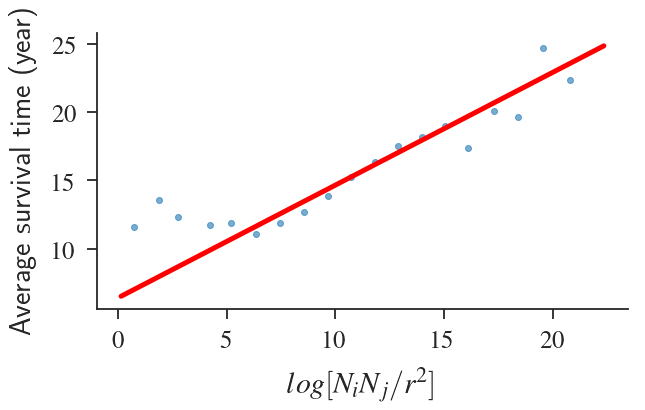

In [321]:
xw,yw = winm(x,y,20)
fig,ax = plt.subplots(figsize=(xs*0.8,ys*0.8))
plt.scatter(xw,yw,alpha=0.6)
plt.plot(fit_x,fit_y,color='r',label=f'fitted: $Y={round(beta,4)} X+{round(const,2)}$')
ax.set_xlabel(r'$log [N_i N_j / r^2]$')
plt.ylabel('Average survival time (year)')
custom_frame(ax)
# plt.legend()
plt.tight_layout()
# plt.savefig('../Figs/Fig.5D_v2.pdf',transparent=True)
plt.show()

In [73]:
y = np.array(x)
x = np.arange(len(x))

In [53]:
fit_df = pd.DataFrame({'X':[i for i,j in zip(x,y) if (math.isfinite(j)==True)],
'Y':[j for i,j in zip(x,y) if (math.isfinite(j)==True)]})
X = fit_df[['X']]
X = sm.add_constant(X)
Y = fit_df[['Y']]
mod = sm.OLS(Y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     484.4
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          1.25e-102
Time:                        10:47:04   Log-Likelihood:                -12631.
No. Observations:                5093   AIC:                         2.527e+04
Df Residuals:                    5091   BIC:                         2.528e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6527      0.084    114.377      0.0

In [54]:
res.conf_int()

,0,1
const,9.487230,9.818125
X,0.000469,0.000561


In [55]:
res.pvalues

const     0.000000e+00
X        1.250646e-102
dtype: float64

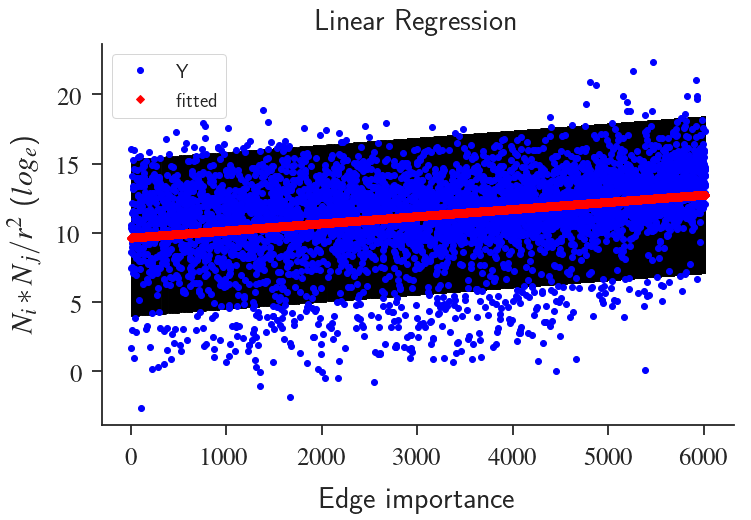

In [56]:
fig, ax = plt.subplots(figsize=figsize)
fig = sm.graphics.plot_fit(res, 1, ax=ax)
plt.xlabel('Edge importance')
plt.ylabel('$N_i*N_j/r^2$ ($log_e$)')
ax.set_title("Linear Regression")
custom_frame(ax)
plt.show()

In [57]:
beta = res.params['X']
const = res.params['const']
fit_x = np.linspace(min(x),max(x),10)
fit_y = beta*fit_x+const

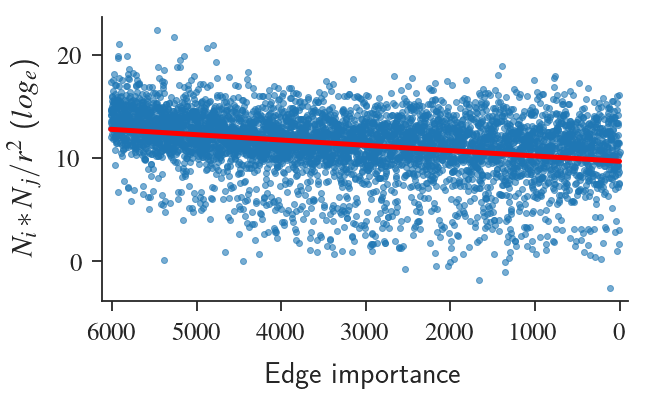

In [63]:
fig,ax = plt.subplots(figsize=(xs*0.8,ys*0.8))
plt.scatter(x,y,alpha=0.6)
plt.plot(fit_x,fit_y,color='r',label=f'fitted: $Y={round(beta,4)} X+{round(const,2)}$')
ax.set_xlim(len(x)+100,0-100)
plt.ylabel('$N_i*N_j/r^2$ ($log_e$)')
plt.xlabel('Edge importance')
custom_frame(ax)
# plt.legend()
plt.tight_layout()
plt.savefig('../Figs/Fig.5D_v1.pdf',transparent=True)
plt.show()

In [29]:
# plot_imp_vs_g(bins=1)

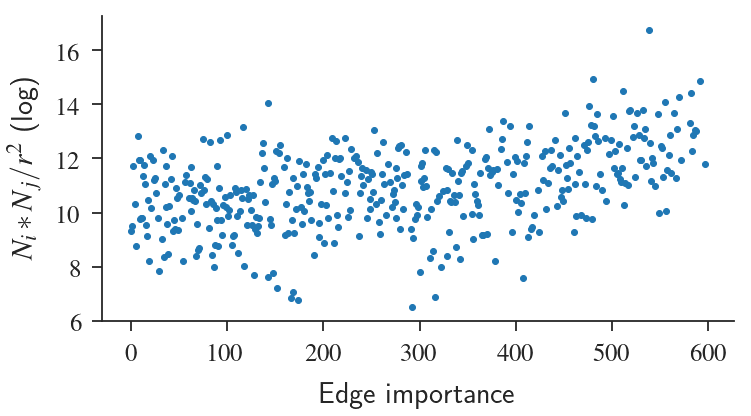

In [113]:
plot_imp_vs_g(bins=10)

In [99]:
plot_imp_vs_g(bins=20)

UnboundLocalError: local variable 'res' referenced before assignment

In [18]:
pop = pd.read_pickle('../data/us_air_mirgration.pkl').to_dict()
def plot_imp_vs_m(bins=50):
    y = []
    for e in data_1[0]:
        a,b = e
        if (a,b) in list(dict_dist.keys()):
            d = dict_dist[(a,b)]
        elif (b,a) in list(dict_dist.keys()):
            d = dict_dist[(b,a)]
        else:
            d = np.nan
        if (a,b) in list(pop.keys()):
            p = pop[(a,b)]
        elif (b,a) in list(pop.keys()):
            p = dict_dist[(b,a)]
        else:
            p = np.nan
        y.append(p/d**2)
    y = np.log(np.array(y))
    y = y[0:bins*(len(y)//bins)]
    y = np.mean(y.reshape(-1, bins), axis=1)
    x = np.arange(len(y))
    fig,ax = plt.subplots(figsize=(xs,ys*0.8))
    plt.scatter(x,y)
    plt.xlabel('Edge importance')
    plt.ylabel('Total Passangers$/r^2$ (log)')
    custom_frame(ax)
    plt.show()

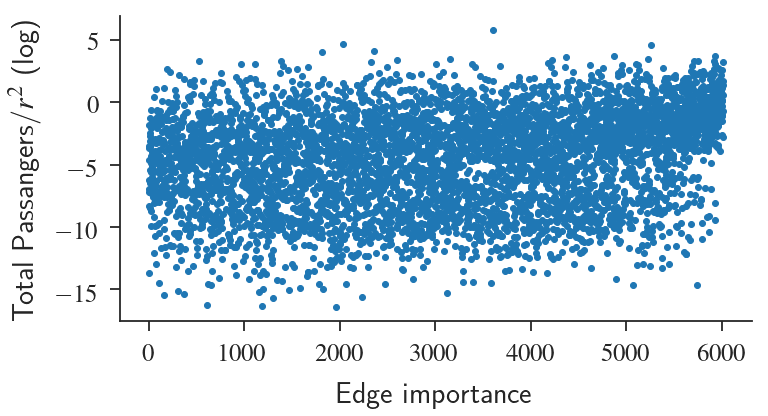

In [24]:
plot_imp_vs_m(bins=1)

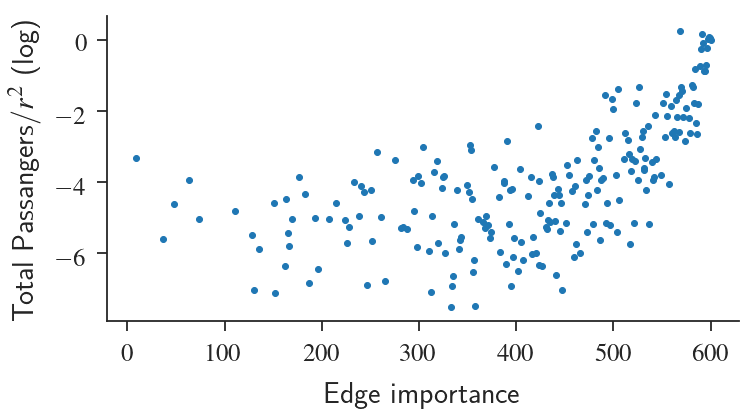

In [25]:
plot_imp_vs_m(bins=10)

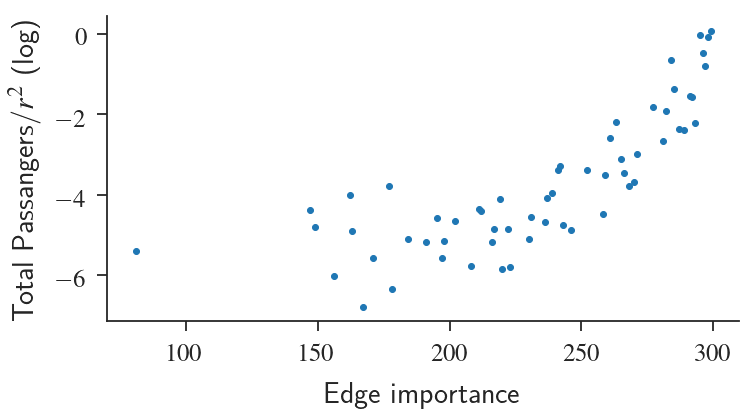

In [26]:
plot_imp_vs_m(bins=20)